In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Чтение CSV файла
df = pd.read_csv('churn.csv')

# Просмотр первых нескольких строк данных
df.head(15)

In [ ]:
print(f"Data has {df.shape[0]} rows, {df.shape[1]} colums.")

Data has 10127 rows, 20 colums.


In [ ]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
import re
def convert_Income_Category(value):
    if isinstance(value, str):
        match = re.search(r'(\d+(?:\.\d+)?)', (value))
        if match:
            return float(match.group(1))
        else:
            return np.nan
    elif isinstance(value, float):
        return value
    else:
        return np.nan
df["Income_Category"] = df["Income_Category"].apply(convert_Income_Category)
df["Income_Category"][5]

40.0

In [ ]:
# Проверка информации о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           9015 non-null   float64
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Проверка на дубликаты
dublicates = df.duplicated().sum()
print(f'Количество дубликатов: {dublicates}')

Количество дубликатов: 0


In [ ]:
propuski = df["Income_Category"].isnull().sum()
print(propuski)

1112


In [ ]:
df["Income_Category"].fillna(df["Income_Category"].mean(), inplace = True)
df["Income_Category"] = df["Income_Category"].astype(int)

<ipython-input-163-2c2119978e9b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income_Category"].fillna(df["Income_Category"].mean(), inplace = True)


<Axes: >

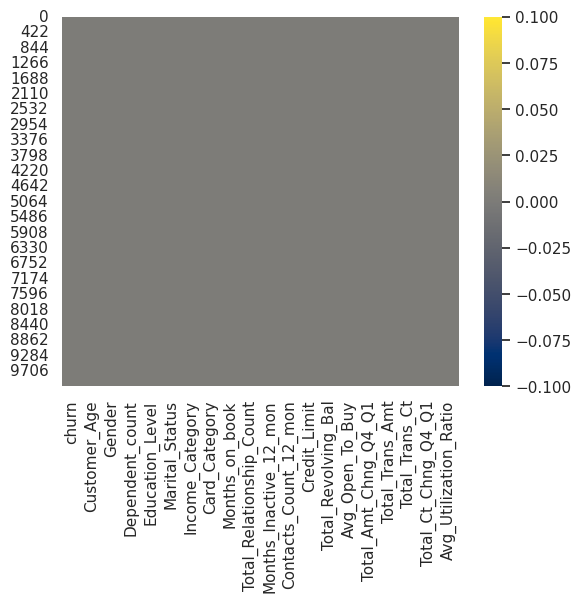

In [ ]:
sns.heatmap(df.isnull(),cmap='cividis')

In [ ]:
df_setect_out=df[['Customer_Age','Credit_Limit','Dependent_count','Months_on_book','Total_Relationship_Count']]
df_setect_out

,Customer_Age,Credit_Limit,Dependent_count,Months_on_book,Total_Relationship_Count
0,45,12691.0,3,39,5
1,49,8256.0,5,44,6
2,51,3418.0,3,36,4
3,40,3313.0,4,34,3
4,40,4716.0,3,21,5
...,...,...,...,...,...
10122,50,4003.0,2,40,3
10123,41,4277.0,2,25,4
10124,44,5409.0,1,36,5
10125,30,5281.0,2,36,4


In [ ]:
outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Customer_Age', 'Credit_Limit', 'Months_on_book']


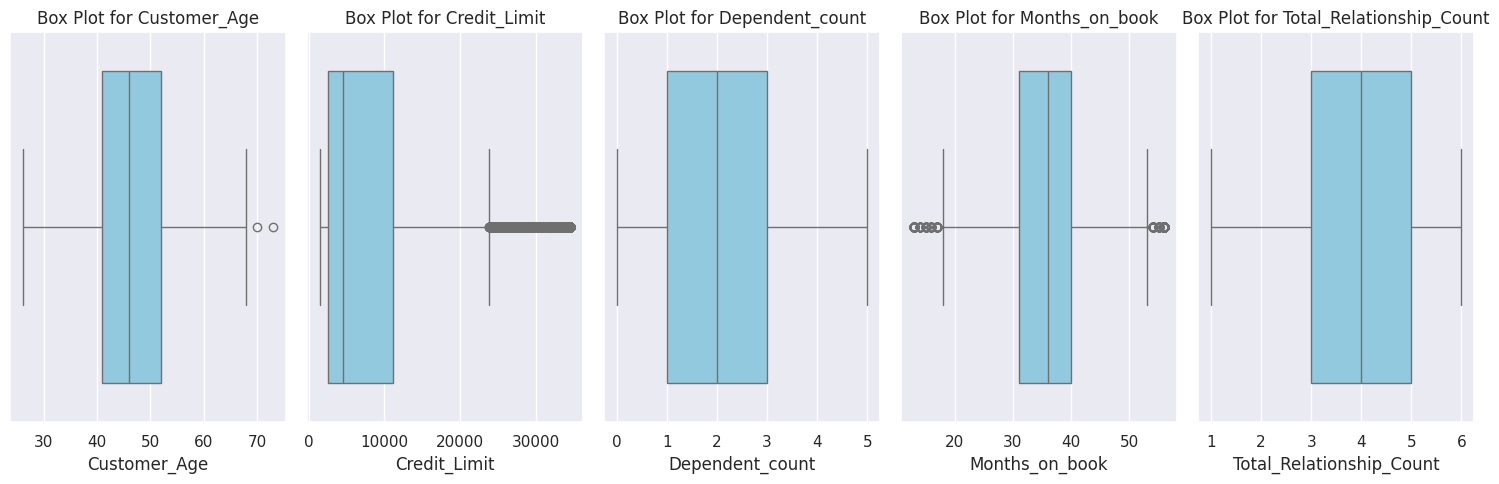

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_setect_out.columns), figsize=(15, 5))

for i, column in enumerate(df_setect_out.columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
data = {
    'Customer_Age': [69, 71, 72, 73, 74, 75],
    'Credit_Limit': [20000, 23800, 27600, 31400, 35200, 39000 ],
    'Month_on_book': [11, 13, 15, 56, 57, 58],
}

df_select_out = pd.DataFrame(data)

def replace_outliers(column, replace_value):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value

for col in ['Customer_Age', 'Credit_Limit', 'Month_on_book']:
    replace_outliers(df_select_out[col], replace_value=df_select_out[col].median())

<ipython-input-168-5c3956c04bd6>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value
<ipython-input-168-5c3956c04bd6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[(column < lower_bound) | (column > upper_bound)] = replace_value
<ipython-input-168-5c3956c04bd6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[(column < lower_bound) | (column > u

In [ ]:
average_age = df.groupby('Customer_Age')['Credit_Limit'].mean().reset_index()
average_age

,Customer_Age,Credit_Limit
0,26,4591.953846
1,27,5532.996875
2,28,8910.103448
3,29,7457.260714
4,30,6466.075714
5,31,8477.200000
6,32,8170.900943
7,33,7455.800000
8,34,7364.219863
9,35,7132.426630


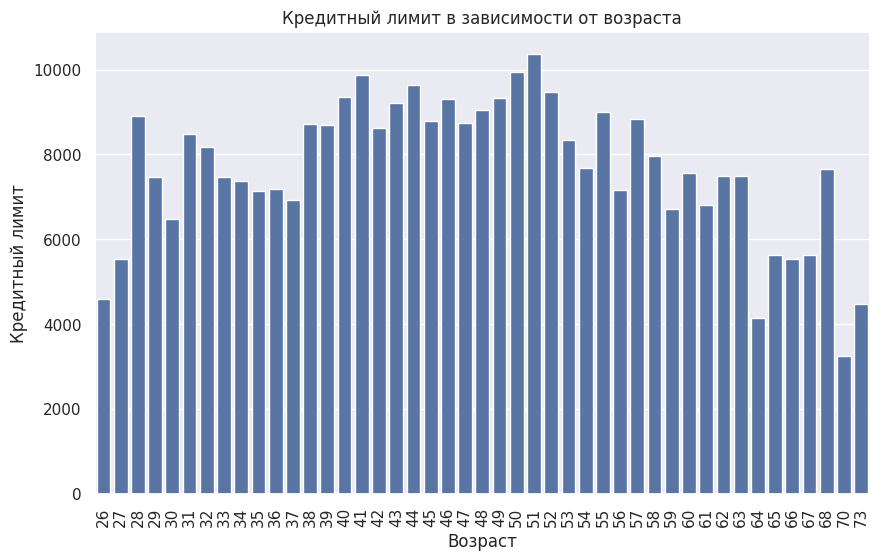

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer_Age', y='Credit_Limit', data=average_age)
plt.title('Кредитный лимит в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Кредитный лимит')
plt.xticks(rotation=90)

plt.show()

In [ ]:
min_age = average_age.loc[average_age['Credit_Limit'].idxmin(), 'Customer_Age']
max_age = average_age.loc[average_age['Credit_Limit'].idxmax(), 'Customer_Age']

min_credit = average_age['Credit_Limit'].min()
max_credit = average_age['Credit_Limit'].max()

print(f'Минимальный кредитный лимит: {min_credit} в возрасте: {min_age}')
print(f'Максимальный кредитный лимит: {max_credit} в возрасте: {max_age}')

Минимальный кредитный лимит: 3252.0 в возрасте: 70
Максимальный кредитный лимит: 10371.480904522612 в возрасте: 51


In [ ]:
edu_counts = df['Education_Level'].value_counts().reset_index()

edu_counts.columns = ['Education_Level', 'Count']
print(edu_counts)

  Education_Level  Count
0        Graduate   3128
1     High School   2013
2         Unknown   1519
3      Uneducated   1487
4         College   1013
5   Post-Graduate    516
6       Doctorate    451


<ipython-input-174-2c9690ad0ec2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x ='Count', y='Education_Level', data=edu_counts, palette='viridis')


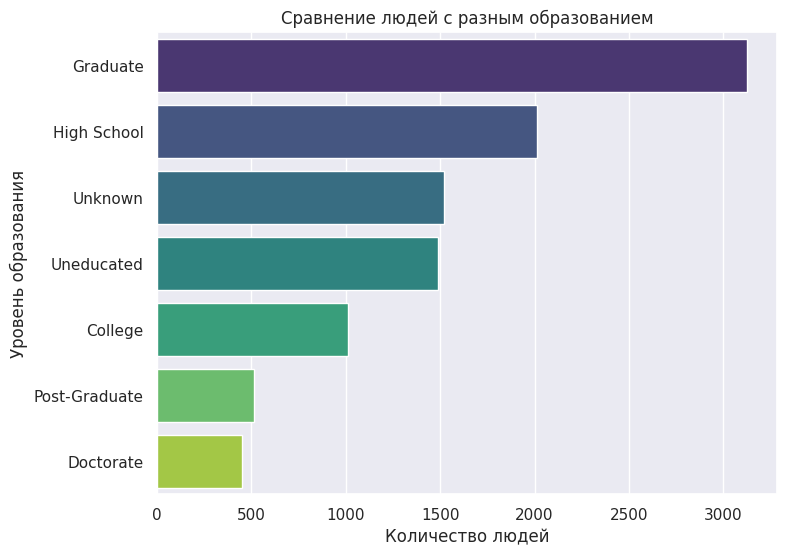

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x ='Count', y='Education_Level', data=edu_counts, palette='viridis')
plt.xlabel("Количество людей")
plt.ylabel("Уровень образования")
plt.title("Сравнение людей с разным образованием")

plt.show()

In [ ]:
corr = df['Customer_Age'].corr(df['Months_on_book'])
print("Взаимоотношение банка с людьми: {:.3f}".format(corr))

Взаимоотношение банка с людьми: 0.789


<ipython-input-176-17a88e4da19d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Customer_Age'], y=df['Months_on_book'], palette = 'twilight')


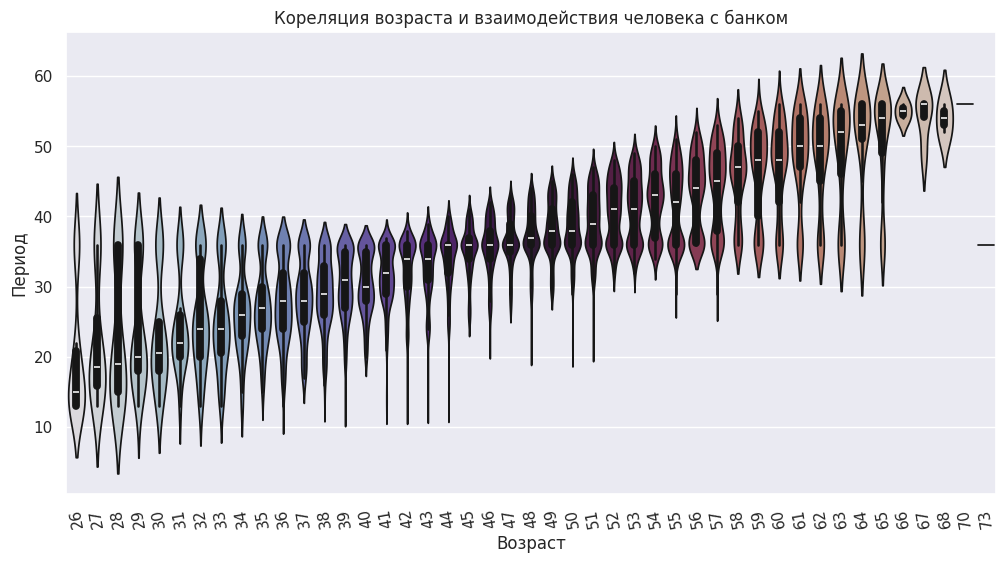

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['Customer_Age'], y=df['Months_on_book'], palette = 'twilight')
plt.title('Кореляция возраста и взаимодействия человека с банком')
plt.ylabel('Период')
plt.xlabel('Возраст')
plt.xticks(rotation=100)

plt.show()

In [ ]:
marital_count = df['Marital_Status'].value_counts()
marital_count

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


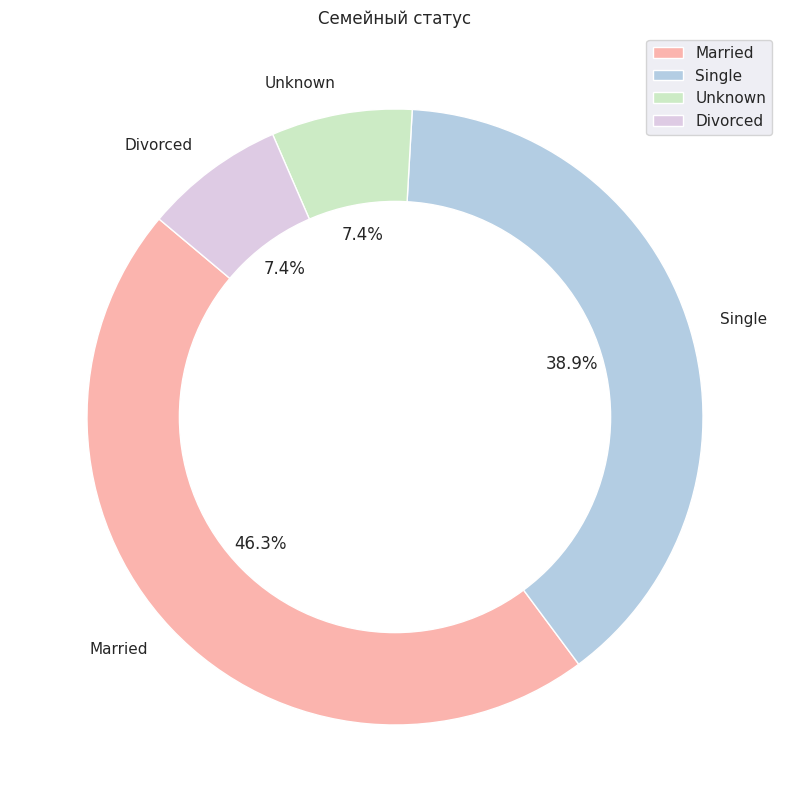

In [ ]:
plt.figure(figsize =(10,10))
plt.pie(marital_count, labels=marital_count.index, autopct = '%1.1f%%', startangle=140, colors = plt.cm.Pastel1.colors)

centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend()
plt.title('Семейный статус')
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categorical_colums = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_colums])
df[categorical_colums] = encoded_data.astype(int)

df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,60,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,40,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,80,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,40,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,60,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,40,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,40,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,40,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,40,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<Axes: >

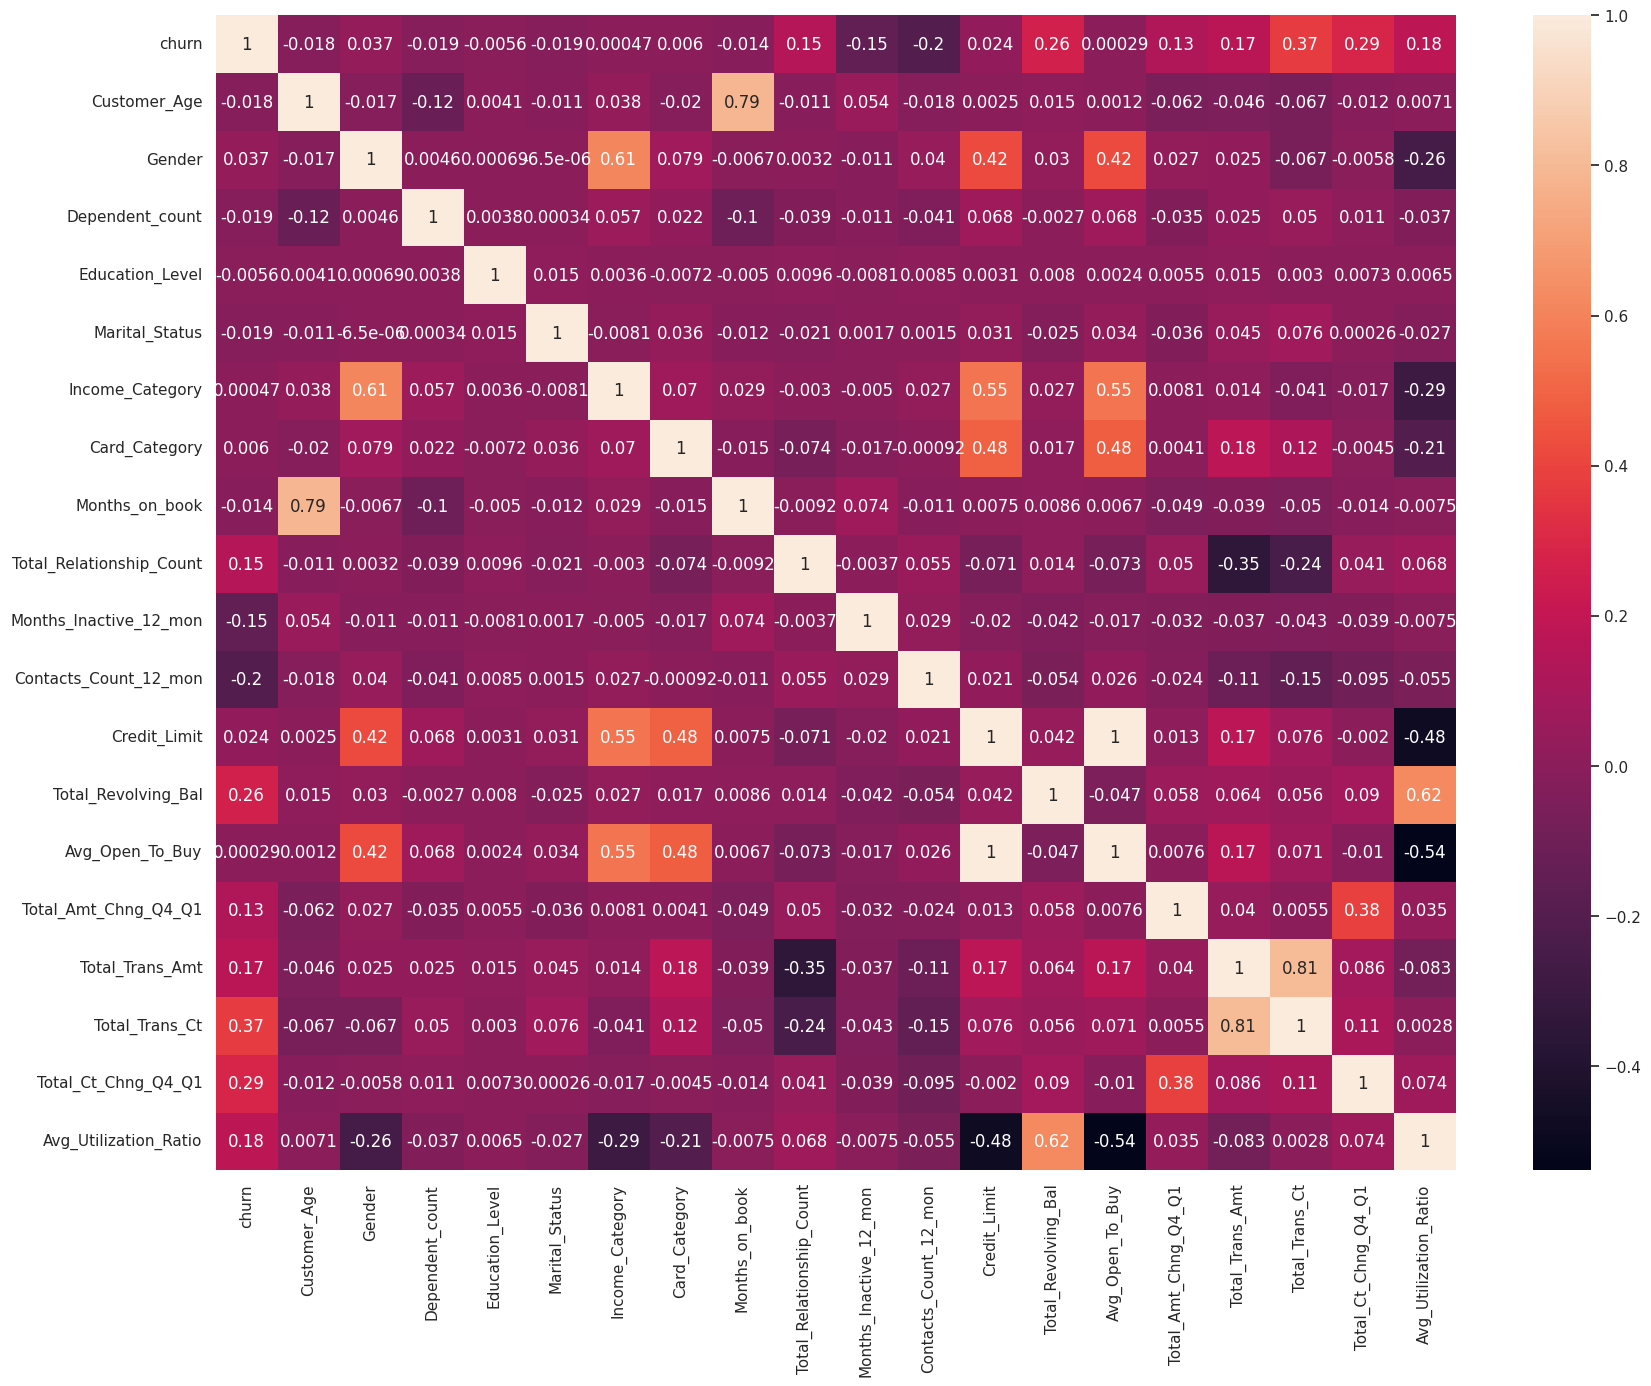

In [ ]:
  plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)

In [ ]:

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
X = df.drop('churn', axis = 1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


from sklearn.dummy import DummyClassifier
dc_mf = DummyClassifier(strategy="most_frequent")
dc_mf.fit(X_train, y_train)

y_true = y_test
y_pred = dc_mf.predict(X_test)

df_mc_tn, dc_mf_fp, dc_mf_fn, dc_mf_tp = confusion_matrix(y_true, y_pred, labels = [0, 1]).ravel()

<Axes: >

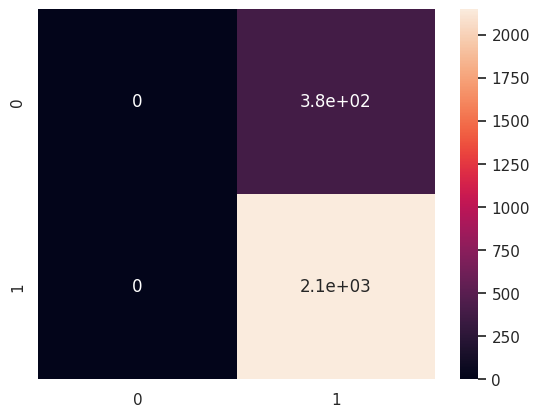

In [ ]:

sns.heatmap(confusion_matrix(y_true, y_pred, labels = [0, 1]),annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
len(y_true)

2532

<Axes: >

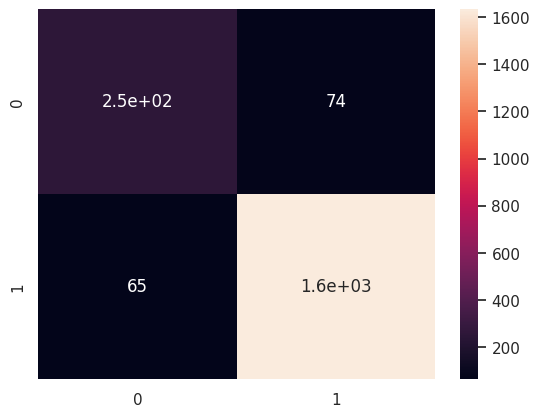

In [ ]:
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       327
           1       0.96      0.96      0.96      1699

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



<Axes: >

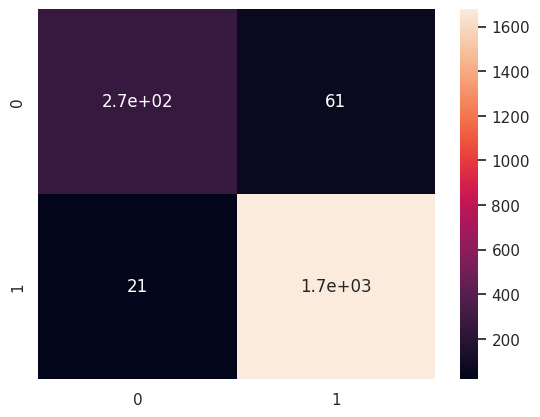

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_true = y_test
y_pred = rfc.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



<Axes: >

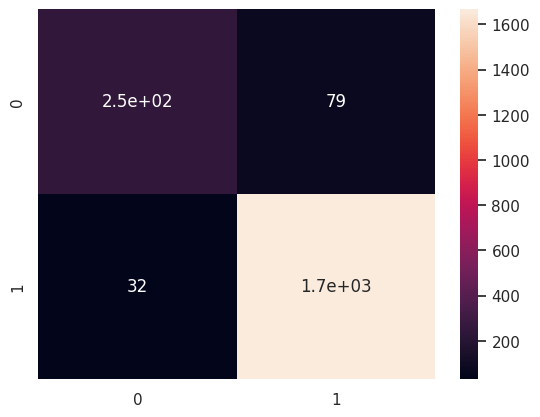

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       327
           1       0.95      0.98      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.92      0.87      0.89      2026
weighted avg       0.94      0.95      0.94      2026



[5, 1, 5]
